In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [8]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv", low_memory=False)


In [9]:
sentiment_df.columns = sentiment_df.columns.str.lower()

trades_df.columns = (
    trades_df.columns
    .str.lower()
    .str.replace(" ", "_")
)


In [10]:
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
trades_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
sentiment_df["classification"].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [13]:
trades_df.describe()


,execution_price,size_tokens,size_usd,start_position,closed_pnl,order_id,fee,trade_id,timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [14]:

trades_df["timestamp"] = pd.to_datetime(trades_df["timestamp"], unit="ms")
trades_df["trade_date"] = trades_df["timestamp"].dt.date
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])
sentiment_df["sentiment_date"] = sentiment_df["date"].dt.date


In [15]:
trades_df["timestamp"].min(), trades_df["timestamp"].max()


(Timestamp('2023-03-28 10:40:00'), Timestamp('2025-06-15 15:06:40'))

In [16]:
trades_df = trades_df.dropna(subset=["closed_pnl", "direction"])


In [17]:
sentiment_df["sentiment"] = sentiment_df["classification"].apply(
    lambda x: "Fear" if "Fear" in x else "Greed"
)


In [18]:
merged_df = trades_df.merge(
    sentiment_df[["sentiment_date", "sentiment"]],
    left_on="trade_date",
    right_on="sentiment_date",
    how="inner"
)


In [19]:
merged_df.shape


(184263, 19)

In [20]:
merged_df["sentiment"].value_counts()


,count
sentiment,
Fear,133871
Greed,50392


In [21]:
merged_df["is_profitable"] = merged_df["closed_pnl"] > 0
merged_df["abs_pnl"] = merged_df["closed_pnl"].abs()

merged_df["high_exposure"] = (
    merged_df["size_usd"] >= merged_df["size_usd"].quantile(0.75)
)


In [22]:
merged_df[["closed_pnl", "is_profitable", "abs_pnl", "size_usd", "high_exposure"]].head()


,closed_pnl,is_profitable,abs_pnl,size_usd,high_exposure
0,0.0,False,0.0,7872.16,True
1,0.0,False,0.0,127.68,False
2,0.0,False,0.0,1150.63,False
3,0.0,False,0.0,1142.04,False
4,0.0,False,0.0,69.75,False


In [23]:
merged_df["is_profitable"].value_counts(normalize=True)


,proportion
is_profitable,
False,0.57965
True,0.42035


In [24]:
merged_df.groupby("sentiment")["closed_pnl"].mean()


,closed_pnl
sentiment,
Fear,50.047622
Greed,69.958017


In [25]:
merged_df.groupby("sentiment")["closed_pnl"].sum()


,closed_pnl
sentiment,
Fear,6.699925e+06
Greed,3.525324e+06


In [26]:
merged_df.groupby("sentiment")["is_profitable"].mean()


,is_profitable
sentiment,
Fear,0.415146
Greed,0.434176


In [27]:
merged_df.groupby("sentiment")["high_exposure"].mean()


,high_exposure
sentiment,
Fear,0.245998
Greed,0.260637


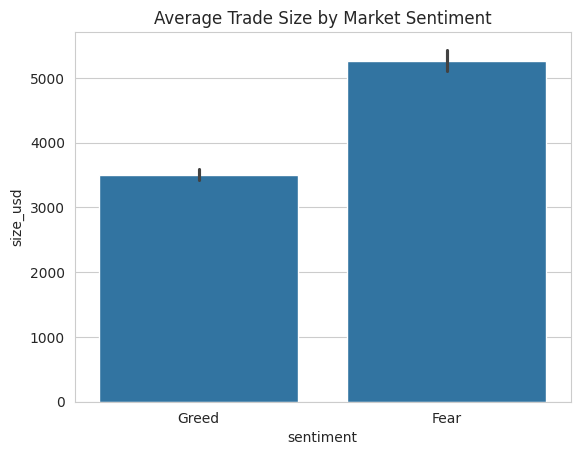

In [28]:
sns.barplot(data=merged_df, x="sentiment", y="size_usd", estimator=np.mean)
plt.title("Average Trade Size by Market Sentiment")
plt.show()


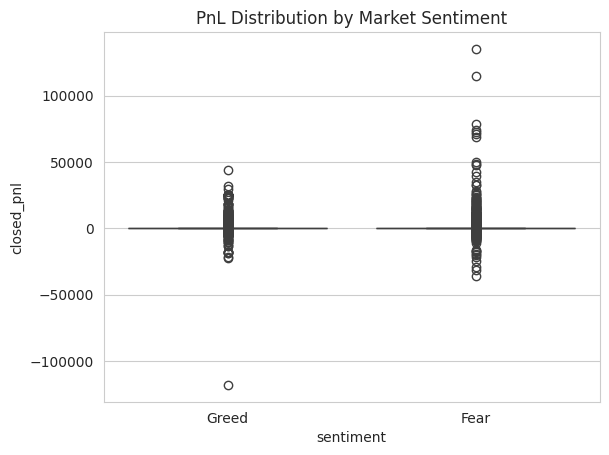

In [29]:
sns.boxplot(data=merged_df, x="sentiment", y="closed_pnl")
plt.title("PnL Distribution by Market Sentiment")
plt.show()


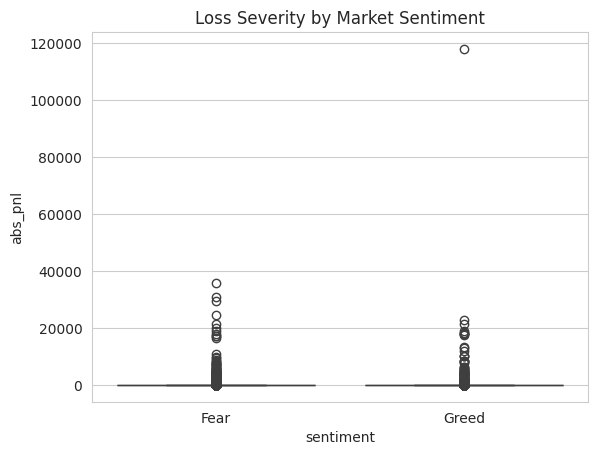

In [30]:
loss_df = merged_df[merged_df["closed_pnl"] < 0]

sns.boxplot(data=loss_df, x="sentiment", y="abs_pnl")
plt.title("Loss Severity by Market Sentiment")
plt.show()


In [31]:
trader_sentiment_perf = (
    merged_df
    .groupby(["account", "sentiment"])["closed_pnl"]
    .sum()
    .reset_index()
)


In [32]:
merged_df.to_csv("merged_trader_sentiment.csv", index=False)


# **Key Findings**
1. **Market sentiment has limited impact on average profitability**

Both Fear and Greed regimes exhibit very similar average PnL and win rates, indicating that sentiment alone does not provide a strong predictive edge for trader success.

2. **Fear periods are associated with significantly higher outcome volatility.**

Trader PnL during Fear shows a much wider distribution, with both larger upside gains and more frequent medium-to-large losses, reflecting elevated risk exposure.

3. **Traders take larger average position sizes during Fear periods.**

Contrary to intuition, average trade size is higher during Fear, suggesting behaviours such as averaging down, value based positioning, or aggressive attempts to capture reversals.

4. **Greed periods show more controlled position sizing but rare extreme losses.**

While Greed trades generally have tighter PnL distributions, isolated extreme loss events indicate occasional overconfidence or late stage risk taking.

5. **Risk distribution, not win rate, differentiates sentiment regimes**

The primary behavioural difference between Fear and Greed lies in downside risk and volatility rather than in average returns or trade success rates.

# Strategy Implications

1. **Risk controls should be tightened during Fear periods.**  
   Fear regimes are associated with higher outcome volatility and larger average trade sizes, increasing the likelihood of frequent medium to large losses. Dynamic risk limits during these periods could reduce downside exposure.

2. **Position sizing rules should adapt to market sentiment.**  
   Fixed sizing approaches may not be optimal across sentiment regimes. Incorporating sentiment aware sizing could help limit excessive exposure during volatile market conditions.

3. **Loss severity is a more informative metric than win rate.**  
   Since win rates remain similar across Fear and Greed, monitoring tail losses and drawdowns provides better insight into trader risk behaviour and long term performance.

4. **Trader evaluation should focus on consistency across sentiment regimes.**  
   Identifying traders who maintain stable performance during both Fear and Greed periods may be more valuable than sentiment specific strategies.

5. **Sentiment should inform risk management, not trade direction.**  
   The analysis suggests sentiment influences how traders take risk rather than whether they win or lose, making it more suitable for risk adjustment frameworks than directional signals.
   
# Limitations & Assumptions

- Market sentiment data is available at a daily level, while trader executions occur at intra day granularity. As a result, intra day sentiment shifts are not captured in this analysis.

- Sentiment classifications were simplified into Fear and Greed regimes. This aggregation may mask nuanced behavioural differences between sub-categories such as Extreme Fear and Extreme Greed.

- The analysis is based on historical trading behaviour and does not imply causation. Observed patterns describe correlations rather than predictive trading signals.

- Trade size was used as a proxy for risk exposure in the absence of explicit leverage information. While effective, this may not fully capture all dimensions of trader risk taking.



# Conclusion

This analysis examined the relationship between Bitcoin market sentiment and trader behaviour using historical execution data and the Fear & Greed Index.

The findings indicate that while average profitability and win rates remain similar across sentiment regimes, trader behaviour differs meaningfully in terms of risk distribution and volatility. Fear periods are characterized by larger average trade sizes and higher outcome variability, leading to both outsized gains and more frequent losses. In contrast, Greed periods exhibit more controlled positioning with occasional extreme loss events.

Overall, the results suggest that market sentiment is more valuable as a **risk management input** than as a directional trading signal. Incorporating sentiment-aware risk controls and trader evaluation frameworks may offer more robust benefits than sentiment-based return chasing.
